# Serious Injuries
##### By Nick Brooks
## Pandas and NLTK

In [ ]:
# General
import numpy as np
import pandas as pd
import nltk
import random
import os

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem.porter import *

# Extra
from os import path
from PIL import Image

# Warnings
import warnings
# warnings.filterwarnings('ignore')

# Model = np.array(Image.open("model.png"))
# Failed attempted at adding a form to wordcloud

In [ ]:
path= r"/Users/nicapotato/Google Drive/Learning/Jupyter/Data/injured-workers" # MAC
#path= r"C:\Users\Nicol\Google Drive\Learning\Jupyter\Data\injured-workers" # Windows
os.chdir(path)
#os.listdir()

# Reference Sheet
#refsheet = pd.ExcelFile(open(os.path.join(path,"oiics_201_code_list.xlsx"),"r", encoding="latin-1"))
refsheet = pd.ExcelFile("oiics_201_code_list.xlsx")
Event = refsheet.parse("Event")
Nature = refsheet.parse("Nature")
Part = refsheet.parse("Part")
Source = refsheet.parse("Source")

In [ ]:
#df = pd.read_csv(open(os.path.join(path, "severeinjury.csv"), "r",encoding="latin-1"))
df = pd.read_csv("severeinjury.csv", encoding="latin-1")

In [ ]:
df.info()

## Features

In [ ]:
df.Hospitalized = df.Hospitalized.astype(int)
df.Amputation= df.Amputation.fillna(0).astype(int)

## Describe

In [ ]:
df.describe(include=['O'])

In [ ]:
df[["Hospitalized","Amputation"]].describe()

In [ ]:
pd.reset_option('max_colwidth')
pd.set_option('display.max_columns', None)
df.head()

In [ ]:
# df["Event"].unique()
# Dictionary the EVENT set to find what is available.

In [ ]:
pd.set_option('max_colwidth', 300)
df[["Final Narrative"]][:20]

In [ ]:
#df.loc[df['Event']==10, ["Final Narrative"]]

In [13]:
df.Amputation.value_counts()
#pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')
# https://www.kaggle.com/ash316/eda-to-prediction-dietanic

0    15791
1     5764
2       18
3        3
9        1
4        1
Name: Amputation, dtype: int64

In [14]:
pd.set_option('max_colwidth', 1000)
df.loc[df['Amputation']>2, ["SourceTitle","Final Narrative", "Amputation", "Employer","State"]]

,SourceTitle,Final Narrative,Amputation,Employer,State
3826,"Metal, woodworking, and special material machinery, n.e.c.","An employee was working in the mold department with the mixing machine. While the employee was pushing the mixing machine, his hand slipped into the mixer. His left index, middle, and ring fingers were amputated.",3,CFM Corporation,OKLAHOMA
6170,"Mowing machinery, unspecified",An employee was cleaning the blades of a lawn mower. The mower jumped and severed four fingers on his left hand.,4,RIVERBAY CORP.,NEW YORK
8264,Metalworking lathes,"An employee had his right hand index, middle, and ring fingers amputated when his glove got caught in the horizontal lathe he was using to polish a 7/8 inch pin with an emery cloth.",3,NRG Energy Services,TEXAS
9471,"Paper production machinery, n.e.c.",An employee was clearing a wrap-up when her hand got caught between two rollers as she was re-threading the web. She partially amputated three left-hand fingers.,3,"Orchids Paper Products Company-Pryor, Oklahoma Converting",OKLAHOMA
20364,"Industrial vehicle, material hauling and transport-powered, n.e.c",An employee parking his clamp/docker material handling equipment was exiting his machine when he realized it was still on. The employee's left foot was pinned between it and another parked docker resulting in three fractured toes.,9,"Lineage Logistics, LLC",TEXAS


## Subset by Top Employer

In [15]:
print(df.Employer.value_counts()[:5])
print(df.Employer.value_counts().keys()[:5])
print(df.Employer.value_counts().index.tolist()[:5])
# Subset Example
# dex = df['Employer'].isin(["UPS"])

U.S. Postal Service             129
U.S. POSTAL SERVICE              58
United States Postal Service     53
UPS                              51
USPS                             40
Name: Employer, dtype: int64
Index(['U.S. Postal Service', 'U.S. POSTAL SERVICE',
       'United States Postal Service', 'UPS', 'USPS'],
      dtype='object')
['U.S. Postal Service', 'U.S. POSTAL SERVICE', 'United States Postal Service', 'UPS', 'USPS']


In [16]:
pd.reset_option('max_colwidth')
emp = df[df['Employer'].isin(df.Employer.value_counts().index.tolist()[:10])]

In [18]:
# Plot Count by State

In [19]:
# Work with Time

In [20]:
emp['Date'] = pd.to_datetime(emp.EventDate) # date parse

D:\WindowsApps\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [21]:
emp['Year'] = emp.Date.dt.year # year

D:\WindowsApps\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [22]:
# emp['YearMonth'] = emp['Date'].apply(lambda x:x.strftime('%Y%m')) # monthyear
# Alternative is to use "Start of Month", and retain date format.

D:\WindowsApps\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


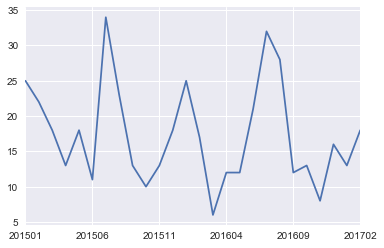

In [23]:
emp.YearMonth.value_counts().sort_index().plot()

Tyson Foods, Inc.
U.S. POSTAL SERVICE
U.S. Postal Service
UPS
US Postal Service
USPS
United Parcel Service
United States Postal Service
Walmart
Waste Management


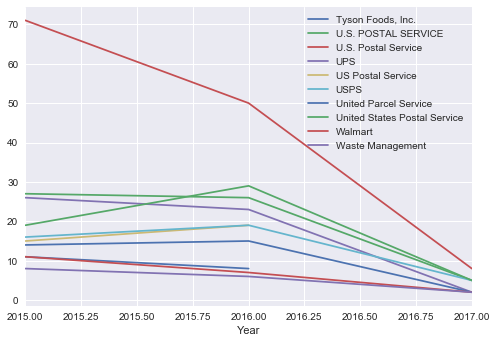

In [84]:
fig, ax = plt.subplots()
grouped = emp.groupby(['Employer','Year'])\
[['Amputation']].count().reset_index().groupby(['Employer'])

[print(key) for key, group in grouped] #tuple

for key, group in grouped:
    group.plot('Year', 'Amputation', label=key, ax=ax)

plt.legend(loc='best')

plt.show()

Tyson Foods, Inc.
U.S. POSTAL SERVICE
U.S. Postal Service
UPS
US Postal Service
USPS
United Parcel Service
United States Postal Service
Walmart
Waste Management


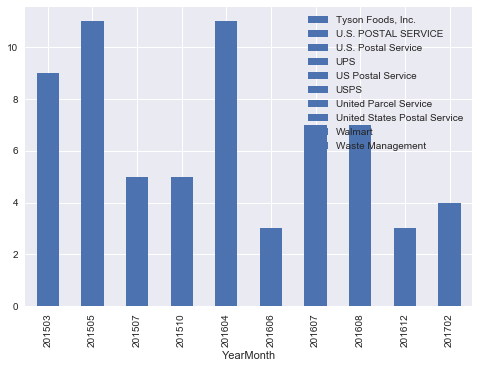

In [80]:
fig, ax = plt.subplots()
grouped = emp.groupby(['Employer','YearMonth'])\
[['Amputation']].count().reset_index().groupby(['Employer'])

[print(key) for key, group in grouped] #tuple

for key, group in grouped:
    group.plot.bar('YearMonth', 'Amputation', label=key, ax=ax)

plt.legend(loc='best')

plt.show()

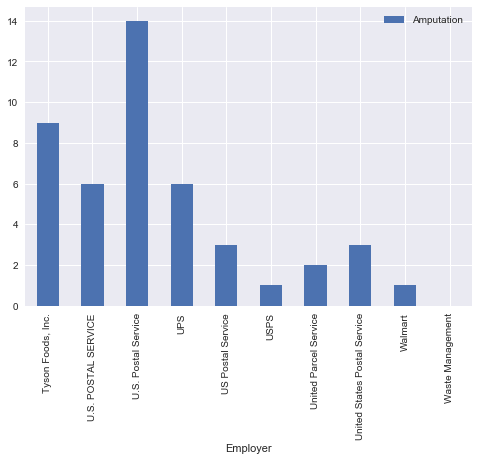

In [83]:
# data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
emp[['Employer','Amputation']]\
.groupby(['Employer'])[['Amputation']].sum().plot.bar()

animal          category
count              int64
date      datetime64[ns]
dtype: object
dog            animal  count  day
date                         
2014-12-25    dog  31095   25
2014-12-26    dog  30581   26
2014-12-27    dog  32001   27
2014-12-28    dog  30676   28
2014-12-29    dog  34573   29
2014-12-30    dog  35776   30
2014-12-31    dog  41821   31
rabbit             animal  count  day
date                          
2014-12-25  rabbit  52895   25
2014-12-26  rabbit  53809   26
2014-12-27  rabbit  57132   27
2014-12-28  rabbit  53903   28
2014-12-29  rabbit  56880   29
2014-12-30  rabbit  58430   30
2014-12-31  rabbit  73172   31


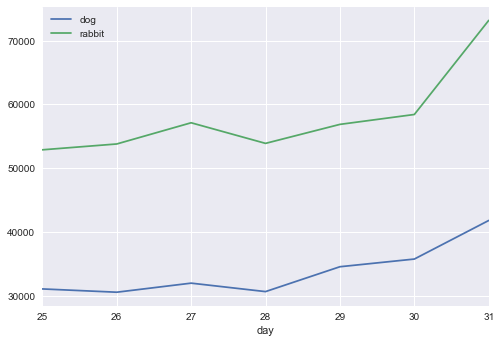

In [86]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Timestamp


df = pd.DataFrame({'animal': {12: 'dog', 44: 'dog', 47: 'dog', 69: 'rabbit', 76: 'rabbit', 84: 'dog', 122: 'rabbit', 162: 'rabbit', 177: 'rabbit', 190: 'rabbit', 217: 'dog', 219: 'dog', 220: 'dog', 226: 'rabbit'},
 'count': {12: 34573, 44: 30676, 47: 41821, 69: 56880, 76: 73172, 84: 30581, 122: 52895, 162: 58430, 177: 57132, 190: 53903, 217: 32001, 219: 35776, 220: 31095, 226: 53809},
 'date': {12: Timestamp('2014-12-29 00:00:00'), 44: Timestamp('2014-12-28 00:00:00'), 47: Timestamp('2014-12-31 00:00:00'), 69: Timestamp('2014-12-29 00:00:00'), 76: Timestamp('2014-12-31 00:00:00'), 84: Timestamp('2014-12-26 00:00:00'), 122: Timestamp('2014-12-25 00:00:00'), 162: Timestamp('2014-12-30 00:00:00'), 177: Timestamp('2014-12-27 00:00:00'), 190: Timestamp('2014-12-28 00:00:00'), 217: Timestamp('2014-12-27 00:00:00'), 219: Timestamp('2014-12-30 00:00:00'), 220: Timestamp('2014-12-25 00:00:00'), 226: Timestamp('2014-12-26 00:00:00')}})

df['animal'] = df['animal'].astype('category')
print(df.dtypes)
df = df.set_index('date')


df['day'] = df.index.day
df = df.sort_values(by='day')
fig, ax = plt.subplots()
grouped = df.groupby(['animal'])
[print(key, group) for key, group in grouped] #tuple
for key, group in grouped:
    group.plot('day', 'count', label=key, ax=ax)

plt.legend(loc='best')

plt.show()

In [88]:
emp.head()[:2]

,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,Inspection,Final Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title,Date,Year,YearMonth
39,2015010061,931759,1/4/2015,U.S. POSTAL SERVICE,1401 W. FORT ST.,NaN,DETROIT,MICHIGAN,48233.0,42.32,-83.06,491110,1,0,1018200.0,Employee was loading a trailer with a forklift...,1120,"Traumatic injuries to spinal cord, unspecified",320,"Back, including spine, spinal cord, unspecified",2737,"Sudden start or stop, nonroadway",8621,"Forklift, order picker, platform truck-powered",483.0,Trailers,2015-01-04,2015,201501
104,2015010138,935399,1/6/2015,U.S. POSTAL SERVICE,6 Shirley Lane,NaN,JAMAICA PLAIN,MASSACHUSETTS,2130.0,42.31,-71.11,491110,1,0,NaN,"An employee fell on ice, causing an abrasion o...",141,"Abrasions, scratches",422,Elbow(s),422,Fall on same level due to slipping,660,"Floors, walkways, ground surfaces, unspecified",9273.0,"Ice, sleet, snow",2015-01-06,2015,201501


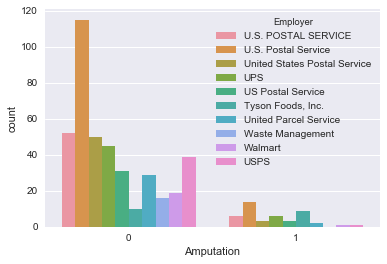

In [27]:
sns.countplot('Amputation',hue='Employer',data=emp)

KeyError: 'Date'

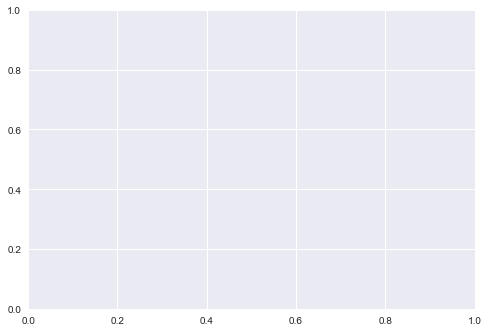

In [87]:
sns.set(style="darkgrid")
sns.tsplot(data=amp_count, time="Date", value="Amputation",
           condition="Employer")

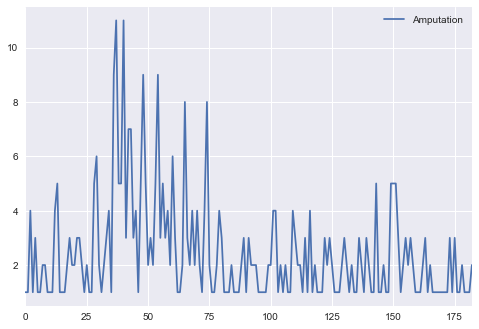

In [89]:
amp_count.plot()

In [33]:
sns.set()

# Plot tip as a function of toal bill across days
g = sns.lmplot(x="sepal_length", y="sepal_width", hue="species",
               truncate=True, size=5, data=iris)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)")

NameError: name 'iris' is not defined

201501    25
201502    22
201503    18
201504    13
201505    18
Name: YearMonth, dtype: int64


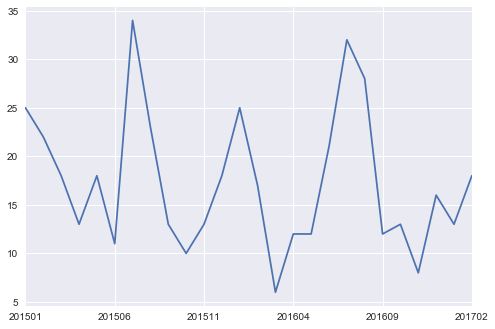

In [92]:
print(emp.YearMonth.value_counts().sort_index()[:5])
emp.YearMonth.value_counts().sort_index().plot()

In [36]:
# Nature Title Anlysis, split various ailments.

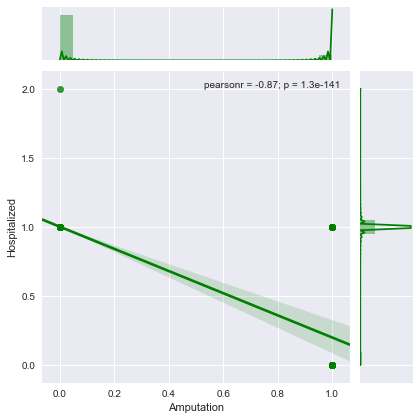

In [37]:
# Plot Amputation vs. Hospitalization
sns.jointplot(data=emp, x='Amputation', y='Hospitalized', kind='reg', color='g')
sns.plt.show()

In [38]:
## Pivot Table
pd.pivot_table(emp, values='Amputation', 
               index=['Employer'], columns=['Hospitalized'], aggfunc='count')

Hospitalized,0,1,2
Employer,,,
"Tyson Foods, Inc.",7.0,12.0,NaN
U.S. POSTAL SERVICE,5.0,52.0,1.0
U.S. Postal Service,12.0,117.0,NaN
UPS,5.0,46.0,NaN
US Postal Service,3.0,31.0,NaN
USPS,NaN,40.0,NaN
United Parcel Service,1.0,30.0,NaN
United States Postal Service,3.0,50.0,NaN
Walmart,NaN,20.0,NaN


In [40]:
# Map the Incident Count by State... zip

## Pre Processing

In [ ]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import *
# ps = LancasterStemmer()
# ps = PorterStemmer()
ps = SnowballStemmer("english")

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    words = [ps.stem(w) for w in words] #4
    return words

In [ ]:
def cloud(text):
    # Setting figure parameters
    mpl.rcParams['figure.figsize']=(10.0,10.0)    #(6.0,4.0)
    mpl.rcParams['font.size']=12                #10 
    mpl.rcParams['savefig.dpi']=100             #72 
    mpl.rcParams['figure.subplot.bottom']=.1 
    
    # Processing Text
    stopwords = set(STOPWORDS) # Redundant
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))

    print(wordcloud)
    
    # Output Visualization
    fig = plt.figure(figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    #fig.savefig("wordcloud.png", dpi=900)

## Word Cloud and NGrams

In [ ]:
cloud(preprocessing(df['Final Narrative']))

In [ ]:
from nltk.util import ngrams
from collections import Counter

def get_ngrams(text, n):
    n_grams = ngrams((text), n)
    return [ ' '.join(grams) for grams in n_grams]

def gramfreq(text,n,num):
    # Extracting bigrams
    result = get_ngrams(text,n)
    # Counting bigrams
    result_count = Counter(result)
    # Converting to the result to a data frame
    df = pd.DataFrame.from_dict(result_count, orient='index')
    df = df.rename(columns={'index':'words', 0:'frequency'}) # Renaming index column name
    #----output----
    print(df.sort_values(["frequency"],ascending=[0])[:num])

In [ ]:
print(gramfreq(preprocessing(df['Final Narrative']),1,15))
print(gramfreq(preprocessing(df['Final Narrative']),2,15))

In [ ]:
print(gramfreq(preprocessing(df['Final Narrative']),3,15))
print(gramfreq(preprocessing(df['Final Narrative']),4,15))

## Supervised Learning

### Functions

In [ ]:
# Function to create model features
# for each review, records which uniqeue words out of the whole text body are present
def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

### Row-Wise Pre-Processing

In [ ]:
df['tokenized'] = df['Final Narrative'].astype(str).str.lower() # turn into lower case text
df['tokenized'] = df.apply(lambda row: tokenizer.tokenize(row['tokenized']), axis=1) # apply tokenize to each row
df['tokenized'] = df['tokenized'].apply(lambda x: [w for w in x if not w in stop_words]) # remove stopwords from each row
#data['tokenized'] = data['tokenized'].apply(lambda x: [ps.stem(w) for w in x]) # apply stemming to each row

# Word Bank
all_words = nltk.FreqDist(preprocessing(df['Final Narrative'])) # calculate word occurence from whole block of text
word_features= list(all_words.keys())[:5000] # 5000 most recurring unique words
print(len(all_words))
labtext= list(zip(df.tokenized, (df.Amputation)))
# Tuple each review with its label

In [ ]:
# Apply function to data
featuresets = [(find_features(text), Amputation) for (text, Amputation) in labtext]
len(featuresets)

In [ ]:
training_set = featuresets[:15000]
testing_set = featuresets[15000:]

In [ ]:
#?nltk.classify
#?nltk.NaiveBayesClassifier.train

%%time
%%memit
classifier = nltk.NaiveBayesClassifier.train(training_set) # Very scalable algorithm
note # Posterior = prior_occurence * likelihood / evidence

print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier, testing_set))*100)
print(classifier.show_most_informative_features(40))

In [ ]:
# Further Detailed Metric
#print("Train Metrics: ", metrics.classification_report(y_train, y_train_pred))
#print("Test Metrics: ", metrics.classification_report(newsgroups_test.target, y_test_pred))

## Deep Natural Language Processing

Focuses on semantic significance of words, extracting the Subject:predicate:object of each sentence.

"the flat tire was replaced by the driver." Here driver is the subject (actor), replaced is the predicate (action), and flat tire is the object (action).

In [ ]:
import jpype
#from extractor import SOPExtractor
#from chunker import PennTreebackChunker

In [ ]:
from chunker import PennTreebackChunker
from extractor import SOPExtractor
# Initialize chunker
chunker = PennTreebackChunker()
extractor = SOPExtractor(chunker)
# function to extract triples
def extract(sentence):
    sentence = sentence if sentence[-1] == '.' else sentence+'.'
    global extractor
    sop_triplet = extractor.extract(sentence)
    return sop_triplet
sentences = [
  'The quick brown fox jumps over the lazy dog.',
  'A rare black squirrel has become a regular visitor to a suburban garden',
  'The driver did not change the flat tire',
  "The driver crashed the bike white bumper"
]
#Loop over sentence and extract triples
for sentence in sentences:
    sop_triplet = extract(sentence)
    print sop_triplet.subject + ':' + sop_triplet.predicate + ':' + sop_
triplet.object